### 332. Reconstruct Itinerary

In [ ]:
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        
        # map that holds outgoing edges for every node
        adj_map = defaultdict(list)
        for u,v in tickets:
            adj_map[u].append(v)

        # lexicographically sort outgoing airports
        for node in adj_map:
            adj_map[node].sort()

        # perform dfs to construct the lexicographically smallest euler path
        res = collections.deque()
        def dfs(node):
            outgoing = adj_map[node]
            while outgoing:
                dfs(outgoing.pop(0))
            res.appendleft(node)
            return

        dfs("JFK")
        return res

- This problem could be solved with a **Depth-first search** over the `outgoing` edges for every `node`.
- We only append a `node` to the **Euler Path** we are trying to find once we have exhausted and searched through every `outgoing` flight for this `node`.
- That way, every edge will be on the **Euler Path** exactly once.

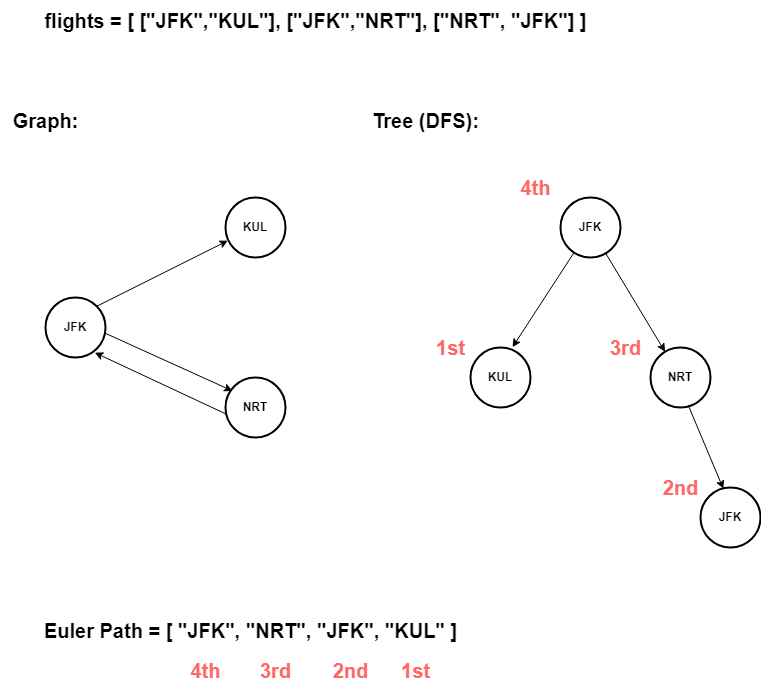

### 542. 01 Matrix

In [ ]:
class Solution:
    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:
        ROWS,COLS = len(mat),len(mat[0])
        grid = [ [0]*COLS for _ in range(ROWS)]
        
        queue,visited = collections.deque(),set()
        for row in range(ROWS):
            for col in range(COLS):
                if mat[row][col] == 0:
                    queue.append((row,col,1))
                    visited.add((row,col))
    
        while queue:
            r,c,d = queue.popleft()
            for row,col in [ (r-1,c),(r,c+1),(r+1,c),(r,c-1) ]:
                if row >= 0 and col >= 0 and row < ROWS and col < COLS and (row,col) not in visited:
                    if mat[row][col] == 1: grid[row][col] = d 
                    queue.append((row,col,d+1))
                    visited.add((row,col))
        
        return grid

- This problem is very similar to the problem *994. Rotting Oranges* in that in both of them, you have to perform a **Breadth-first search with multiple starting points**.
- The starting points are all fields that contain a `0` and will be added to the `queue` and `visited` initially, and whenever we encounter a field with a `1` in our BFS, we set the value in that field to the search depth `d`.

### 847. Shortest Path Visiting All Nodes

In [ ]:
class Solution:
    def shortestPathLength(self, graph: List[List[int]]) -> int:
        queue = collections.deque()
        visited = set()
        for i in range(len(graph)):
            visited.add((1 << i, i))
            queue.append((1 << i, i, 0))

        while queue:
            bitmask, node, depth = queue.popleft()
            # this is asking whether the bitmask has all 1's set  i.e. 2**4 -1 == bin'1111'
            if bitmask == 2 ** len(graph) - 1:
                break
            for neighbor in graph[node]:
                new_bitmask = bitmask | (1 << neighbor)
                if (new_bitmask, neighbor) in visited:
                    continue
                visited.add((new_bitmask, neighbor))
                queue.append((new_bitmask, neighbor, depth + 1))

        return depth

- This problem could be solved via a slightly modified version of **Breadth-first search with multiple starting points**.
- Instead of marking a `node` as `visited` if we simply encounter it, we mark a `node` as `visited` in combination with its `bitmask`, which **shows the nodes that have been visited** in order to reach this node.
- We also keep track of the **search depth** via the variable `depth` and return it once we encounter the first `node` with a `bitmask` that is fully set, meaning that **all nodes have been visited** along the path to reach this node.
- The reason we return `depth` is because it represents the length of the path that led to the `node` with the fully set `bitmask`.

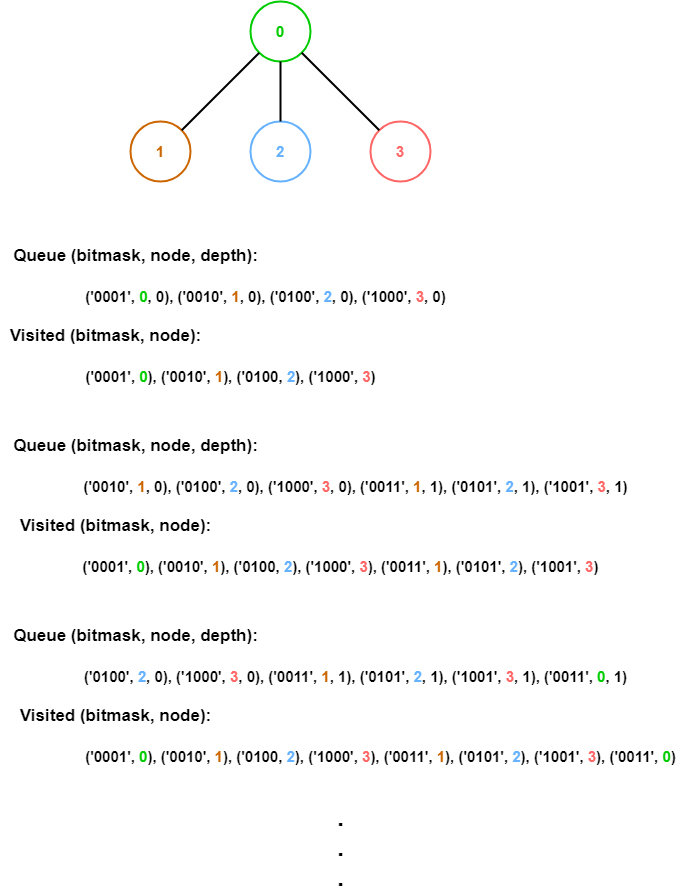

### 1203. Sort Items by Groups Respecting Dependencies

In [ ]:
class Solution:
    def kahn(self, nodes, constraints):
        in_degree = defaultdict(int)
        edges = defaultdict(list)
        for n1,n2 in constraints:
            edges[n1].append(n2)
        print('\n---------KAHN-------------')
        print(f'nodes: {nodes}  constraints: {constraints}')
        print(f'in_degree: {dict(in_degree)}  edges: {dict(edges)}')

        # calculate in degrees for all nodes
        for n1 in edges:
            for n2 in edges[n1]:
                in_degree[n2] += 1

        # put all nodes with an in degree of 0 into the queue
        queue = collections.deque()
        for node in nodes:
            if in_degree[node] == 0:
                queue.append(node)

        # perform kahn's algorithm (sequentially removing nodes when they have in degree 0)
        count,ordering = 0,[]
        while queue:
            n1 = queue.popleft()
            ordering.append(n1)

            for n2 in edges[n1]:
                in_degree[n2] -= 1
                if in_degree[n2] == 0: queue.append(n2)
            count += 1

        # if there are still nodes left, we have a cycle, in which case we return an empty list
        if count != len(nodes): 
            print([])
            return []
        else: 
            print(ordering)
            return ordering


    def sortItems(self, n: int, m: int, group: List[int], beforeItems: List[List[int]]) -> List[int]:
        groups = defaultdict(list)
        internal_constraints,external_constraints = defaultdict(list),[]
        z_list = list(zip(group, beforeItems))

        # construct the dictionary 'groups' that holds each group with a unique identifier
        unique = -1
        for i in range(len(group)):
            if group[i] == -1:
                groups[unique].append(i)
                group[i] = unique
                unique -= 1
            else:
                groups[group[i]].append(i)

        # construct internal cosntraints for each group and external constraints for all groups
        for item,t in enumerate(z_list):
            for before in t[1]:
                if group[item] == group[before]:
                    internal_constraints[group[item]].append([before,item])
                else:
                    external_constraints.append([group[before],group[item]])
        print(f'zipped list:          {z_list}\ngroups:               {dict(groups)}\ninternal constraints: {dict(internal_constraints)}\nexternal constraints: {external_constraints}')

        # Step 1: fulfill internal constraints
        for group in internal_constraints.keys():
            sorted_group = self.kahn(groups[group], internal_constraints[group])
            if not sorted_group: return sorted_group
            groups[group] = sorted_group
        print(f'\ngroups (step 1):      {dict(groups)}')

        # Step 2: fulfill external constraints 
        sorted_groups = []
        if external_constraints:
            nodes = list(set([ group for constraint in external_constraints for group in constraint ]))
            sorted_groups = self.kahn(nodes, external_constraints)
            if not sorted_groups: return sorted_groups
        print(f'\ngroups (step 2):      {dict(groups)}')

        # Step 3: return result
        res = []
        for group in sorted_groups:
            res.append(groups[group])
        for group in groups.values():
            if group not in res: res.append(group)
        res_flat = []
        for l in res:
            res_flat += l
        
        return res_flat

- Wow, I feel like I have been able to learn a lot from this problem; it certainly took a while to complete.
- First, we extract the internal constraints (how do nodes have to be rearranged within groups) and the external constraints (how do the groups have to be rearranged) from the given `group` and `beforeItems`.
- Then, we use **Kahn's Algorithm** to first rearrange the groups internally, using `internal_constraints`, and then rearrange the groups using `external_constraints`.

### 1584. Min Cost to Connect All Points

In [ ]:
class UnionFind:
    def __init__(self,nodes):
        self.parents = list(range(nodes+1))
        self.ranks = [1]*(nodes+1)

    def find(self,node):
        p = self.parents[node]
        while p != self.parents[p]:
            p = self.parents[self.parents[p]]
            p = self.parents[p]
        return p
        
    def union(self,n1,n2):
        p1,p2 = self.find(n1),self.find(n2)
        if p1 == p2: 
            return False
        elif self.ranks[p1] > self.ranks[p2]:
            self.ranks[p1] += self.ranks[p2]
            self.parents[p2] = p1
        elif self.ranks[p1] <= self.ranks[p2]:
            self.ranks[p2] += self.ranks[p1]
            self.parents[p1] = p2
        return True
        

class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        edges = []
        for x1,y1 in points:
            for x2,y2 in points:
                if x1 != x2 or y1 != y2:
                    edges.append(([x1,y1],[x2,y2],abs(x1-x2)+abs(y1-y2)))
        
        alias = dict()
        for i,point in enumerate(points):
            alias[tuple(point)] = i+1
        
        uf = UnionFind(len(points))
        edges.sort(key=lambda x: x[2])
        
        res = 0
        for p1,p2,w in edges:
            if uf.union(alias[tuple(p1)],alias[tuple(p2)]):
                res += w

        return res

- This problem could be solved by finding a **Minimum Spanning Tree** using **Kruskal's Algorithm**.
- First, we create a list, `edges`, containing every possible edge between the given `points` and their weights.
- Then, we apply **Kruskal's Algorithm** to find an **MST**, which gets facilitated by our implementation of the **Union Find Algorithm**, which tells us whether adding an edge would result in a cycle.

### 1615. Maximal Network Rank

In [ ]:
class Solution:
    def maximalNetworkRank(self, n: int, roads: List[List[int]]) -> int:
        if len(roads) == 0: return 0
        
        adjMap = defaultdict(list)
        for e1,e2 in roads:
            adjMap[e1].append(e2)
            adjMap[e2].append(e1)
            
        adjMap = dict(reversed(sorted(adjMap.items(), key=lambda item: len(item[1]))))
        nodes = list(adjMap.keys())
        l0,l1 = len(adjMap[nodes[0]]),len(adjMap[nodes[1]])
        maxV = 0
        
        for i in range(len(nodes)):
            ni_edges = adjMap[nodes[i]]
            if len(ni_edges) != l0: break

            for j in range(i+1,len(nodes)):
                nj_edges = adjMap[nodes[j]]
                if len(nj_edges) != l1: break

                sumV = len(ni_edges) + len(nj_edges)
                sumV = sumV-1 if nodes[j] in adjMap[nodes[i]] else sumV
                if sumV > maxV: maxV = sumV
        
        return maxV

- We create an adjacency map, `adjMap`, that holds a list of connected edges for every node.
- Then we sort `adjMap` by the number of edges such that the nodes with the largest number of edges are at the front.
- Lastly, we have to iterate over all combinations of two nodes with the same number of edges as the top two nodes (`l0` and `l1`) to find two nodes that are not connected to each other.

### 1631. Path With Minimum Effort

In [ ]:
class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        ROWS,COLS = len(heights),len(heights[0])
        dist_grid = [[float(inf)]*COLS for _ in range(ROWS)]
        dist_grid[0][0] = 0
        res = 0
        
        queue, visited = collections.deque([(0,0,0)]), {(0,0)}
        while queue:
            r,c,dist = queue.popleft()
            res = max(res,dist)
            if r == ROWS-1 and c == COLS-1: 
                break
            
            for row,col in [(r-1,c),(r,c+1),(r+1,c),(r,c-1)]:
                if row >= 0 and row < ROWS and col >= 0 and col < COLS:
                    dist = abs(heights[row][col]-heights[r][c])
                    if dist >= dist_grid[row][col]:
                        continue
                    dist_grid[row][col] = dist
                    bisect.insort(queue,(row,col,dist),key=lambda x: x[2])
                    
        return res

- This problem could be solved with a slightly modified version of **Breadth-first search**.
- The differences are that we are using a **Priority Queue** that is sorted by edge weights in non-descending order, and instead of using a `visited` set, we are using a distance map, `dist_grid`, so we can revisit nodes when we find a way to reach them with a lower edge weight.
- How it works exactly is further elaborated in the graphic below.

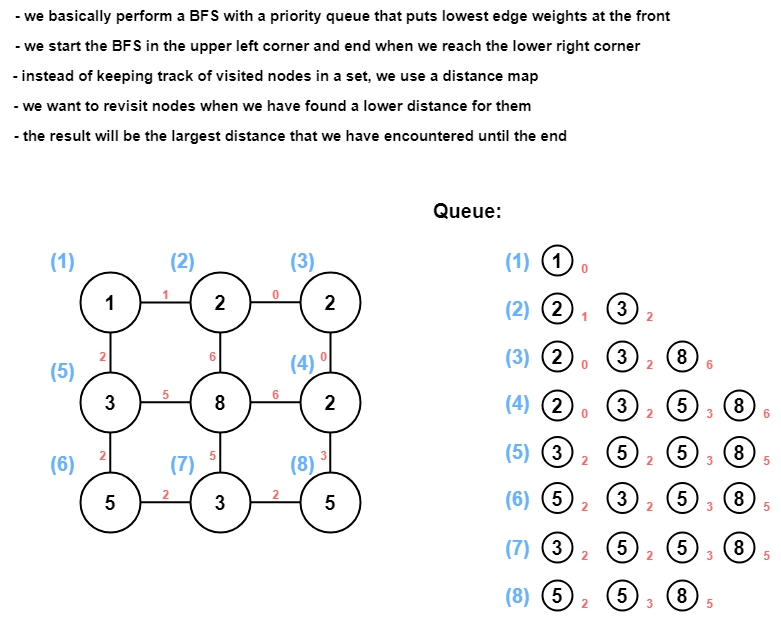